In [98]:

#Requirement 1 : finding correlation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Importing,using the day column as indexing column
data = pd.read_csv('sp500_27270.csv',index_col=0)



#Getting the corelationfor the Column of SP500 (creating a new dataframe selecting in the same time)
df = pd.DataFrame(data.corr(),columns=['SP500'])
#Getting Companies with correlations>=0.95 or <=-0.95
toWrite=df[(df.SP500>=0.95) | (df.SP500<=-0.95)]


 

['SP500', 'ACN', 'ATVI', 'ADBE', 'AET', 'AFL', 'A', 'ALL', 'AMT', 'APH', 'ADI', 'ANTM', 'AON', 'AAPL', 'AJG', 'ADSK', 'ADP', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BLK', 'CDNS', 'CTAS', 'CSCO', 'CTXS', 'CME', 'CSX', 'ECL', 'EXPD', 'FDX', 'HRS', 'IQV', 'JBHT', 'JPM', 'KLAC', 'LLL', 'LH', 'LRCX', 'LMT', 'MAR', 'MMC', 'MA', 'MSFT', 'NEE', 'NTRS', 'PGR', 'PLD', 'RJF', 'RTN', 'RSG', 'COL', 'ROP', 'SHW', 'SPGI', 'SYK', 'STI', 'SNPS', 'TEL', 'TXN', 'TMO', 'TMK', 'TSS', 'TDG', 'UNH', 'V', 'WM', 'WAT', 'XYL', 'YUM', 'ZTS']


In [105]:
#Requirement 2: Dividing the Dataset into Training,Testing,Validation sets Using Sklearn library

#my approach:
#Divide the the Data set into training and validation sets(80%:20%)
#Then further divide thr training set into a training and testing sets(80%:20%)

from sklearn.model_selection import train_test_split
#list of names of the companies that's highly corelated the SP500 index values
columns=list(toWrite.index)[1:]
#Getting the actual values of these companies and putting them in an array of arrays where each index in it the corresponding val to x Day



#Reducing the dataset to the desired columns only
reducedFrame= pd.DataFrame(data,columns=columns)

# Formin an array of arrays in which every index is a row(day) in the reduced frame
result_array =reducedFrame.values.tolist()




y=list(data.SP500) #defining target variable/Dependant variable Y


#creating Training and validation sets 
X_trainIntial, X_test, y_trainIntial, y_test = train_test_split(result_array, y, test_size=0.2,random_state=42)




#Random state is used to make sure every time it splits we get the same data(because by default it splits on a random variable)



[1676.12, 1655.45, 1656.4, 1692.56, 1703.2, 1710.14, 1698.06, 1721.54, 1733.15, 1744.5, 1744.66, 1754.67, 1746.38, 1752.07, 1759.77, 1762.11, 1771.95, 1763.31, 1756.54, 1761.64, 1767.93, 1762.97, 1770.49, 1747.15, 1770.61, 1771.89, 1767.69, 1782.0, 1790.62, 1798.18, 1791.53, 1787.87, 1781.37, 1795.85, 1804.76, 1802.48, 1802.75, 1807.23, 1805.81, 1800.9, 1795.15, 1792.81, 1785.03, 1805.09, 1808.37, 1802.62, 1782.22, 1775.5, 1775.32, 1786.54, 1781.0, 1810.65, 1809.6, 1818.32, 1827.99, 1833.32, 1842.02, 1841.4, 1841.07, 1848.36, 1831.98, 1831.37, 1826.77, 1837.88, 1837.49, 1838.13, 1842.37, 1819.2, 1838.88, 1848.38, 1845.89, 1838.7, 1843.8, 1844.86, 1828.46, 1790.29, 1781.56, 1792.5, 1774.2, 1794.19, 1782.59, 1741.89, 1755.2, 1751.64, 1773.43, 1797.02, 1799.84, 1819.75, 1819.26, 1829.83, 1838.63, 1840.76, 1828.75, 1839.78, 1836.25, 1847.61, 1845.12, 1845.16, 1854.29, 1859.45, 1845.73, 1873.91, 1873.81, 1877.03, 1878.04, 1877.17, 1867.63, 1868.2, 1846.34, 1841.13, 1858.83, 1872.25, 1860.77

In [101]:
#Requirement4:Train the neural network with both the sgd and adam optimizers.
#Attempt different values for the learning rate with each optimizer to
#achieve the best result. You should indicate the values you used
#and the performance observed in each case. Justify your
#observations.
from sklearn.neural_network import MLPRegressor 
import matplotlib.pyplot as plt

#using Adam optimizer
nn=MLPRegressor(activation='relu',early_stopping=True,
            
                hidden_layer_sizes=(26,155,128),
              learning_rate='constant', learning_rate_init=0.023980,random_state=0,
              max_iter=20000, solver='adam' )

#32,155,128  30,155,128   26,155,128(0.99),adam,constant,2000,0.023980,random_state=0

#128,6(0.971)   150,3(0.98) 220,6(0.974) 0.0000001resonable mean//

#150,3(0.00000009,0.982)  => (0.00000008,0.989)


nn.fit(X_trainIntial,y_trainIntial)
y_predict=nn.predict(X_test)

print(nn.score(X_test,y_test))

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))

0.9901629090737741
Mean squared error: 936.78


After adjusting the learning rate with both optimizers ..
We found that the Adam optimizer performed better than the SGD 

With the following parameters fixed
max_iter=20000
Learning rate = constant 
And Early Stopping =True 
Activation:relu	
And we use a random_state=0 an integer used as seed to randomize the order of the instances every iteration.

The only variable  that was adjusted across our findings “optimal training parameters”
Was the hidden_layer_sizes 
With adam it was = 26,155,128
With SGD it was =150,3

Overall the adam optimizer had a score of (approx) 0.99 test test score
And the SGD had a score of (approx) 0.989

What we noticed that the Leaning rate couldnt be further optimized in the SGD than
(0.000000008) to yield a higher score 

And with the Adam optimizer it was (0.023980)
	
Why we think the Adam works better than the SGD

Adam is storing an exponentially decaying average of past squared gradients versus the SGD it performs frequent updates with a high variance that cause the objective function to fluctuate heavily
What we can conclude from that the possibility of adam reaching a better local minima or a global minima (if we’re lucky) is higher since it’s (adaptive property) allows it to tackle  getting stuck in local minimas better thus reaching better scores overall.!

------------------------------------------
We used early stopping to avoid overfitting 
We believe early stopping is a double edged sword., in most cases early stopping will cause premature convergence however since our results were good then early stopping served as a good sword in our battle with error gradient ascend .

------------------------------------------



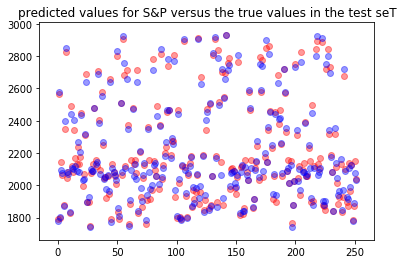

In [108]:
#plotting 

import matplotlib.pyplot as plt

plt.title("predicted values for S&P versus the true values in the test seT")

area =25  # 0 to 15 point radii


days=[i for i in range(len(y_predict))]

plt.scatter(days,y_predict,alpha=0.4,color='r')
plt.scatter(days,y_test,alpha=0.4,color='b')




plt.show()


Since we predicted the value of the sp500 based on the most highly correlated companies stock value ..based on that
We can argue that the sp500 index value is mostly affected by the stock values of the mostly correlated companies to it (correlation >0.95 %) .. 
At The points that are difficult to predict,  the sp500 correlating with another companies outside the 72 that we intially selected  thus rendering them inaccurate .